In [3]:
import pandas as pd
df=pd.read_csv(r"C:\Users\hamad\OneDrive\Documents\features.csv")
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,6/28/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,7/5/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,7/12/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,7/19/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [4]:
stores=pd.read_csv(r"C:\Users\hamad\OneDrive\Documents\stores.csv")
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [58]:
train=pd.read_csv(r"C:\Users\hamad\OneDrive\Documents\train.csv")
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2/5/2010,24924.50,False
1,1,1,2/12/2010,46039.49,True
2,1,1,2/19/2010,41595.55,False
3,1,1,2/26/2010,19403.54,False
4,1,1,3/5/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,9/28/2012,508.37,False
421566,45,98,10/5/2012,628.10,False
421567,45,98,10/12/2012,1061.02,False
421568,45,98,10/19/2012,760.01,False


In [6]:
import pandas as pd


# التأكد من تنسيق التاريخ
train['Date'] = pd.to_datetime(train['Date'])
df['Date'] = pd.to_datetime(df['Date'])

# دمج train مع features
merged = pd.merge(train, df, on=['Store', 'Date'], how='left')

# دمج الناتج مع stores
merged = pd.merge(merged, stores, on='Store', how='left')

# عرض أول صفوف
print(merged.head())


   Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50        False        42.31       2.572   
1      1     1 2010-02-12      46039.49         True        38.51       2.548   
2      1     1 2010-02-19      41595.55        False        39.93       2.514   
3      1     1 2010-02-26      19403.54        False        46.63       2.561   
4      1     1 2010-03-05      21827.90        False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  IsHoliday_y Type    Size  
0         8.106        False    A  1

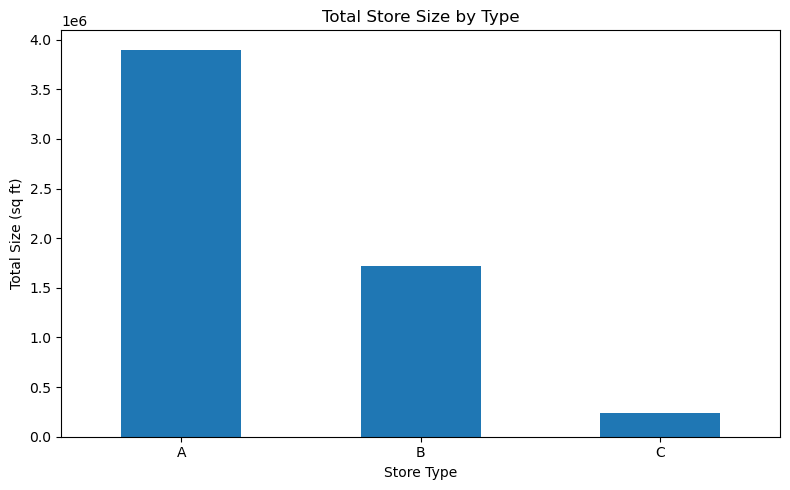

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

total_size_by_type = stores.groupby("Type")["Size"].sum()

plt.figure(figsize=(8,5))
total_size_by_type.plot(kind="bar")

  
plt.title("Total Store Size by Type")
plt.xlabel("Store Type")
plt.ylabel("Total Size (sq ft)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()




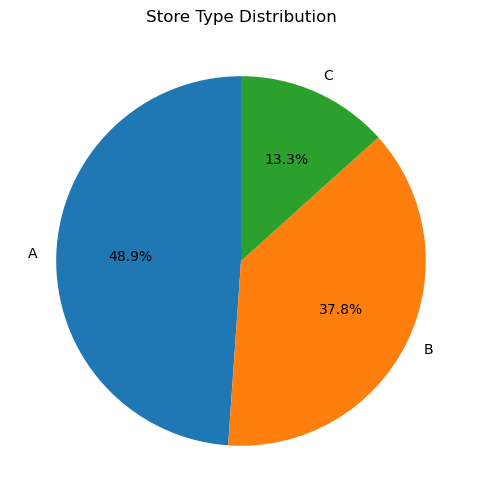

In [20]:
# Count the number of stores per type
store_counts = stores['Type'].value_counts()

# Pie Chart
plt.figure(figsize=(6, 6))
store_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Store Type Distribution")
plt.ylabel("")
plt.show()



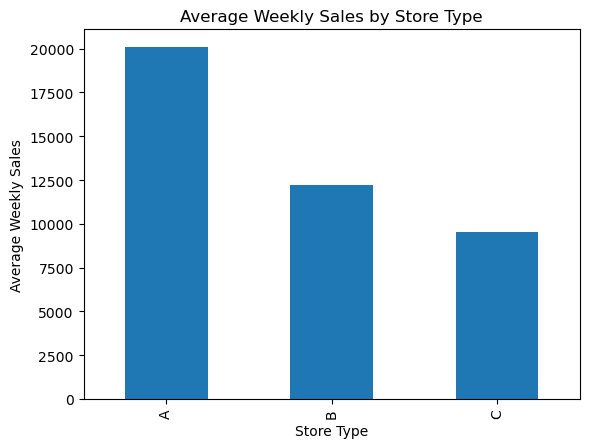

In [22]:
import matplotlib.pyplot as plt

# Plot average weekly sales per store type
merged.groupby('Type')['Weekly_Sales'].mean().plot(kind='bar')

# Add English labels and title
plt.title('Average Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales')

# Show the plot
plt.show()


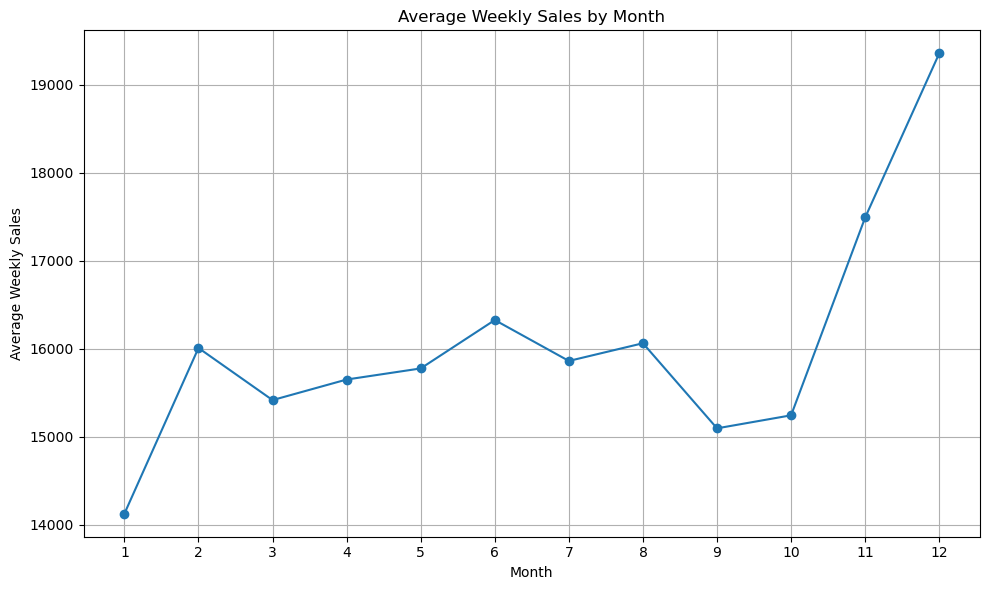

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

merged['Date'] = pd.to_datetime(merged['Date'])

merged['Month'] = merged['Date'].dt.month

monthly_sales = merged.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Average Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.xticks(range(1, 13))  
plt.grid(True)
plt.tight_layout()
plt.show()


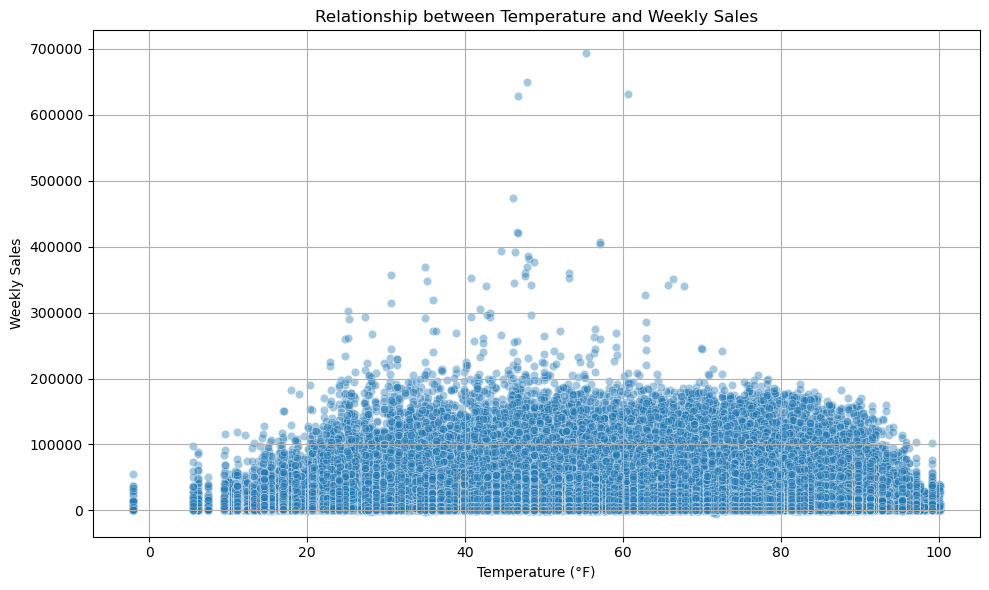

Correlation between Temperature and Weekly Sales: -0.00


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot بين درجة الحرارة والمبيعات
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged, x='Temperature', y='Weekly_Sales', alpha=0.4)
plt.title('Relationship between Temperature and Weekly Sales')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# حساب معامل الارتباط بين درجة الحرارة والمبيعات
correlation = merged['Temperature'].corr(merged['Weekly_Sales'])
print(f'Correlation between Temperature and Weekly Sales: {correlation:.2f}')


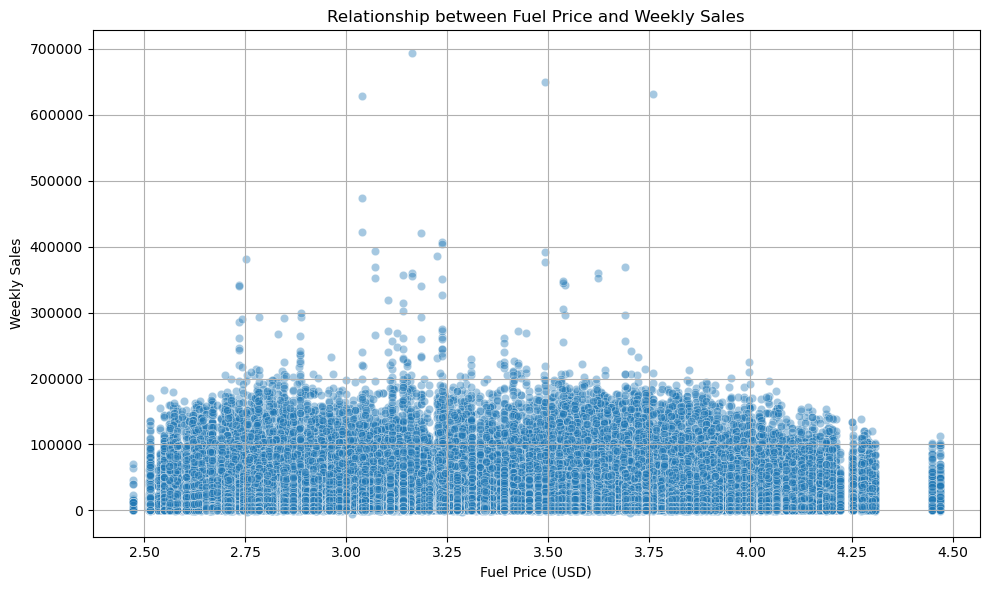

Correlation between Fuel Price and Weekly Sales: -0.00


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot between Fuel Price and Weekly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged, x='Fuel_Price', y='Weekly_Sales', alpha=0.4)
plt.title('Relationship between Fuel Price and Weekly Sales')
plt.xlabel('Fuel Price (USD)')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = merged['Fuel_Price'].corr(merged['Weekly_Sales'])
print(f'Correlation between Fuel Price and Weekly Sales: {correlation:.2f}')


In [30]:
correlation = merged['Weekly_Sales'].corr(merged['CPI'])
print(f"Correlation between Weekly Sales and CPI: {correlation:.4f}")


Correlation between Weekly Sales and CPI: -0.0209


C:\Users\hamad\AppData\Local\Temp\ipykernel_2432\4147797801.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales = merged.groupby(pd.cut(merged[col], bins=10))['Weekly_Sales'].mean()


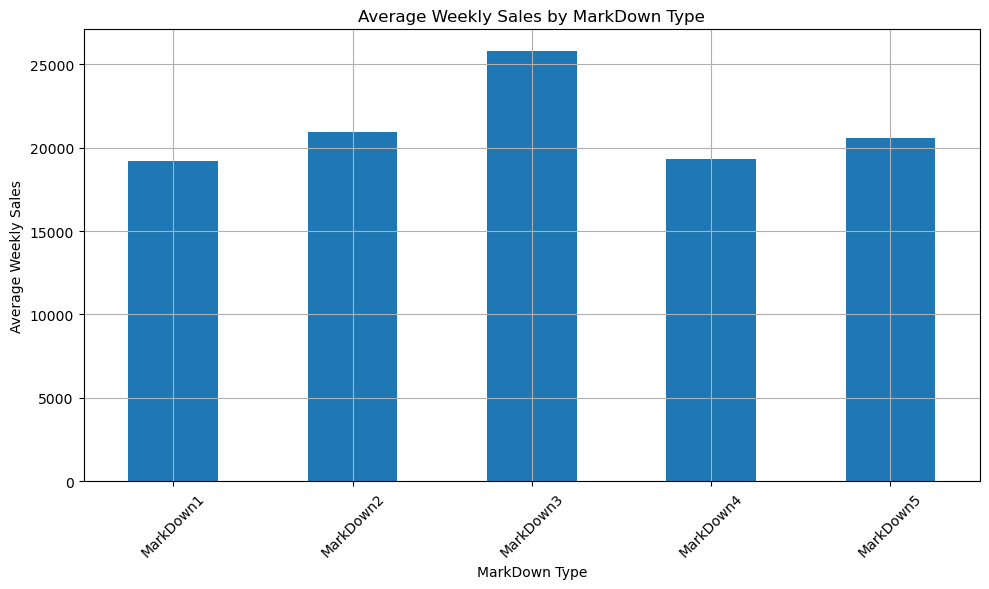

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# إنشاء قائمة بالـ MarkDowns
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# حساب متوسط المبيعات لكل نوع من MarkDown (مع تجاهل القيم الفارغة)
avg_sales_by_markdown = {}

for col in markdown_cols:
    avg_sales = merged.groupby(pd.cut(merged[col], bins=10))['Weekly_Sales'].mean()
    avg_sales_by_markdown[col] = avg_sales.mean()  # المتوسط العام

# تحويل النتائج إلى DataFrame
avg_sales_df = pd.DataFrame.from_dict(avg_sales_by_markdown, orient='index', columns=['Average Weekly Sales'])

# رسم Bar Chart
avg_sales_df.plot(kind='bar', legend=False, figsize=(10, 6), title='Average Weekly Sales by MarkDown Type')
plt.ylabel('Average Weekly Sales')
plt.xlabel('MarkDown Type')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


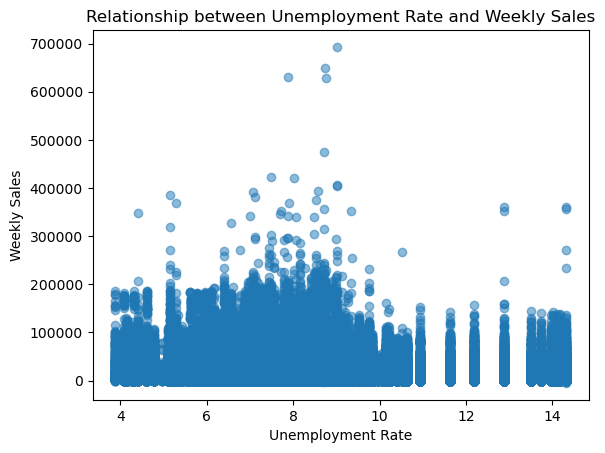

Correlation between Unemployment Rate and Weekly Sales: -0.0259


In [56]:
# Scatter plot between Unemployment and Weekly Sales
plt.scatter(merged['Unemployment'], merged['Weekly_Sales'], alpha=0.5)
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales')
plt.title('Relationship between Unemployment Rate and Weekly Sales')
plt.show()

# Calculate correlation
correlation = merged['Unemployment'].corr(merged['Weekly_Sales'])
print(f"Correlation between Unemployment Rate and Weekly Sales: {correlation:.4f}")


IsHoliday_x
False    15901.445069
True     17035.823187
Name: Weekly_Sales, dtype: float64


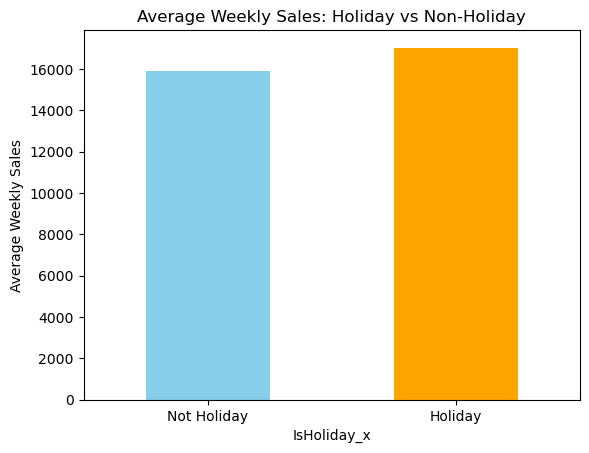

In [36]:
import matplotlib.pyplot as plt

# متوسط المبيعات في الإجازات مقابل الأيام العادية
holiday_sales = merged.groupby('IsHoliday_x')['Weekly_Sales'].mean()

# عرض الأرقام
print(holiday_sales)

# رسم بياني
holiday_sales.plot(kind='bar', color=['skyblue', 'orange'])
plt.xticks([0, 1], ['Not Holiday', 'Holiday'], rotation=0)
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.show()


In [50]:
test=pd.read_csv(r"C:\Users\hamad\OneDrive\Documents\test.csv")
test

,Store,Dept,Date,IsHoliday
0,1,1,11/2/2012,False
1,1,1,11/9/2012,False
2,1,1,11/16/2012,False
3,1,1,11/23/2012,True
4,1,1,11/30/2012,False
...,...,...,...,...
115059,45,98,6/28/2013,False
115060,45,98,7/5/2013,False
115061,45,98,7/12/2013,False
115062,45,98,7/19/2013,False


In [81]:
import pandas as pd

# تحميل البيانات
train = pd.read_csv(r"C:\Users\hamad\OneDrive\Documents\train.csv")
stores = pd.read_csv(r"C:\Users\hamad\OneDrive\Documents\stores.csv")

# دمج بيانات المتاجر مع بيانات المبيعات
df = pd.merge(train, stores, on="Store", how="left")

# تحويل العمود Date إلى صيغة تاريخ
df['Date'] = pd.to_datetime(df['Date'])

# ترتيب البيانات حسب التاريخ
df = df.sort_values(by='Date')


In [83]:
# اختيار فرع معين و Dept معين (مثلاً Store 1 - Dept 1)
df_store = df[(df['Store'] == 1) & (df['Dept'] == 1)]

# استخدام التاريخ كمؤشر
df_store = df_store.set_index('Date')

# عرض أول البيانات
print(df_store[['Weekly_Sales']].head())


            Weekly_Sales
Date                    
2010-02-05      24924.50
2010-02-12      46039.49
2010-02-19      41595.55
2010-02-26      19403.54
2010-03-05      21827.90


In [85]:
# حساب المتوسط المتحرك لفترة 4 أسابيع
df_store['Rolling_Mean'] = df_store['Weekly_Sales'].rolling(window=4).mean()

# عرض النتائج
print(df_store[['Weekly_Sales', 'Rolling_Mean']].head(10))


            Weekly_Sales  Rolling_Mean
Date                                  
2010-02-05      24924.50           NaN
2010-02-12      46039.49           NaN
2010-02-19      41595.55           NaN
2010-02-26      19403.54    32990.7700
2010-03-05      21827.90    32216.6200
2010-03-12      21043.39    25967.5950
2010-03-19      22136.64    21102.8675
2010-03-26      26229.21    22809.2850
2010-04-02      57258.43    31666.9175
2010-04-09      42960.91    37146.2975


In [87]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# إعداد النموذج وتدريبه
model = SimpleExpSmoothing(df_store['Weekly_Sales']).fit(smoothing_level=0.2, optimized=False)

# التوقعات
df_store['Exp_Smooth'] = model.fittedvalues

# عرض النتائج
print(df_store[['Weekly_Sales', 'Exp_Smooth']].head(10))


            Weekly_Sales    Exp_Smooth
Date                                  
2010-02-05      24924.50  24924.500000
2010-02-12      46039.49  24924.500000
2010-02-19      41595.55  29147.498000
2010-02-26      19403.54  31637.108400
2010-03-05      21827.90  29190.394720
2010-03-12      21043.39  27717.895776
2010-03-19      22136.64  26382.994621
2010-03-26      26229.21  25533.723697
2010-04-02      57258.43  25672.820957
2010-04-09      42960.91  31989.942766


C:\Users\hamad\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


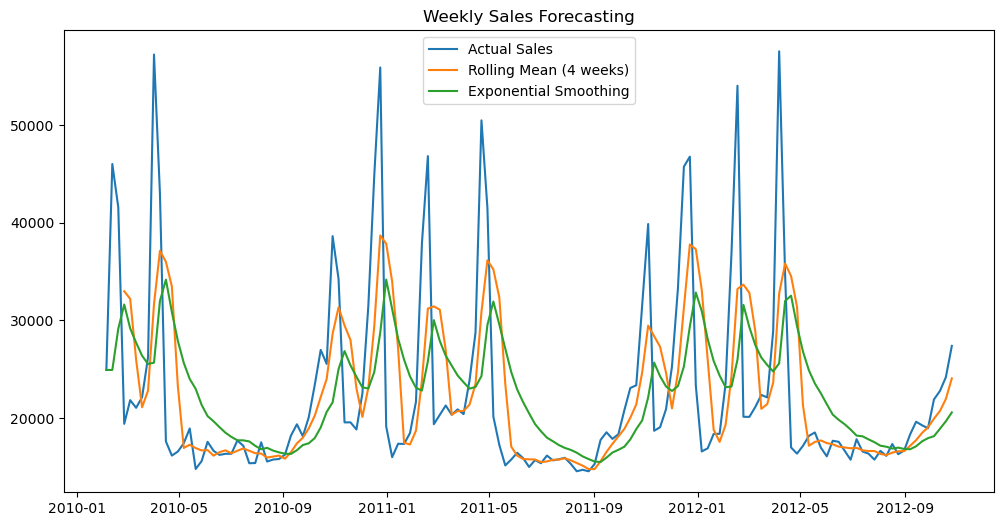

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_store.index, df_store['Weekly_Sales'], label='Actual Sales')
plt.plot(df_store.index, df_store['Rolling_Mean'], label='Rolling Mean (4 weeks)')
plt.plot(df_store.index, df_store['Exp_Smooth'], label='Exponential Smoothing')
plt.legend()
plt.title("Weekly Sales Forecasting")
plt.show()


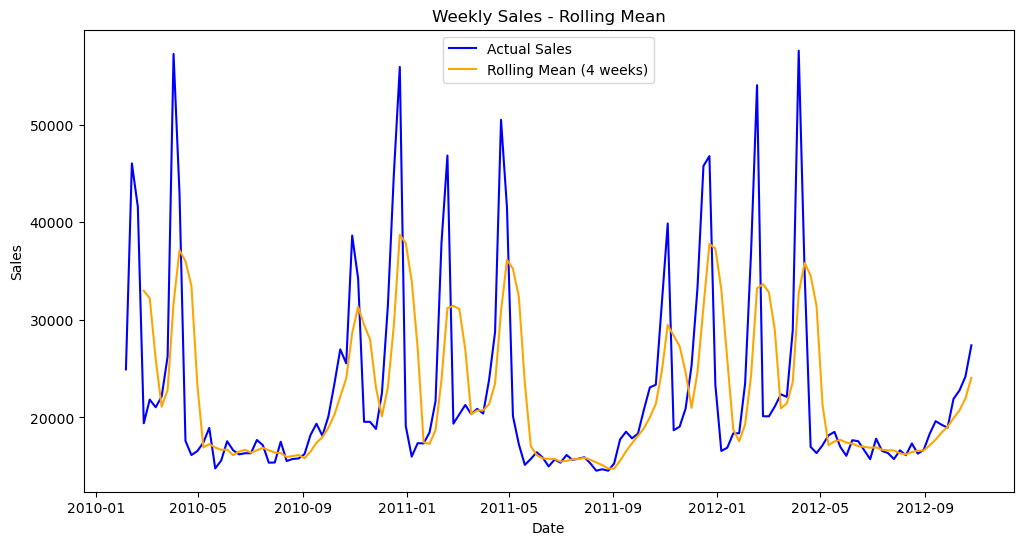

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_store.index, df_store['Weekly_Sales'], label='Actual Sales', color='blue')
plt.plot(df_store.index, df_store['Rolling_Mean'], label='Rolling Mean (4 weeks)', color='orange')
plt.legend()
plt.title("Weekly Sales - Rolling Mean")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


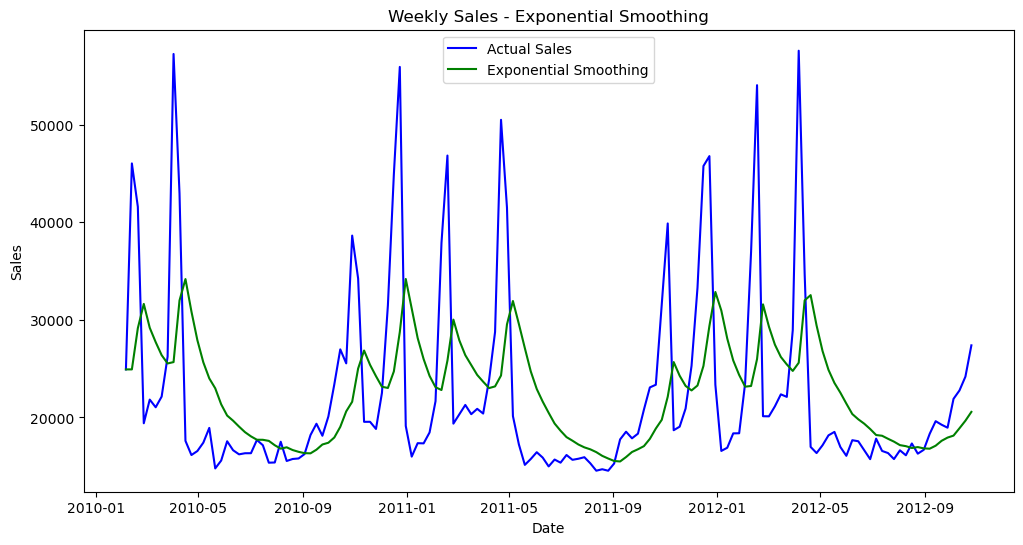

In [93]:
plt.figure(figsize=(12,6))
plt.plot(df_store.index, df_store['Weekly_Sales'], label='Actual Sales', color='blue')
plt.plot(df_store.index, df_store['Exp_Smooth'], label='Exponential Smoothing', color='green')
plt.legend()
plt.title("Weekly Sales - Exponential Smoothing")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [97]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# قراءة البيانات
train = pd.read_csv(r"C:\Users\hamad\OneDrive\Documents\train.csv")
train['Date'] = pd.to_datetime(train['Date'])
train = train.sort_values(['Store', 'Dept', 'Date'])

# اختيار Store و Dept
store_id = 1
dept_id = 1
df = train[(train['Store'] == store_id) & (train['Dept'] == dept_id)].copy()

# تقسيم البيانات
split_point = int(len(df) * 0.8)
train_df = df.iloc[:split_point]
valid_df = df.iloc[split_point:]

# Rolling Mean (window=4)
rolling_pred = train_df['Weekly_Sales'].rolling(window=4).mean().iloc[-len(valid_df):].values

# Exponential Smoothing
model = SimpleExpSmoothing(train_df['Weekly_Sales']).fit(smoothing_level=0.2, optimized=False)
exp_pred = model.forecast(len(valid_df))

# حساب Accuracy
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

metrics = {
    "Rolling MAE": mean_absolute_error(valid_df['Weekly_Sales'], rolling_pred),
    "Rolling RMSE": np.sqrt(mean_squared_error(valid_df['Weekly_Sales'], rolling_pred)),
    "Rolling MAPE": mape(valid_df['Weekly_Sales'], rolling_pred),
    "ExpSmooth MAE": mean_absolute_error(valid_df['Weekly_Sales'], exp_pred),
    "ExpSmooth RMSE": np.sqrt(mean_squared_error(valid_df['Weekly_Sales'], exp_pred)),
    "ExpSmooth MAPE": mape(valid_df['Weekly_Sales'], exp_pred)
}

for k, v in metrics.items():
    print(f"{k}: {v:.2f}")


Rolling MAE: 8434.97
Rolling RMSE: 10476.66
Rolling MAPE: 46.78
ExpSmooth MAE: 13416.33
ExpSmooth RMSE: 13827.98
ExpSmooth MAPE: 76.53
